1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

Numpy documentation https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html

Mersenne Twister - PRNG (pseudorandom number generator) https://en.wikipedia.org/wiki/Mersenne_Twister


## Purpose of numpy.random

Random number generation is vital for many practical programming needs such as security, model-building, simulation creation and statistical research. Of course, being deterministic machines, computers cannot create truly random numbers and so simulate randomness to create what are called pseudorandom numbers. These numbers are generally drawn from specific probability distributions and require an initial input seed to which an algorithm is applied in order to generate the numbers.    

### Why use numpy.random instead of built-in random.random?
While random.random by default produces single random numbers, it can produce multiple if used with the range function. However, numpy.random allows you to produce increasingly complex arrays of random numbers. https://realpython.com/python-random/#prngs-for-arrays-numpyrandom

According to Python for Data Analysis (p. 118) numpy.random supplements the random module with a few extra probability distributions and functions
https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

## Simple Random Data
At its most basic, numpy.random is used to generate random numbers or arrays of numbers. There are several functions within this package that create such simple random data and each one does so in different ways, across various distributions. 

### rand and randn
The numpy.random.rand and numpy.random.randn fuctions each generates a random number or array of numbers from uniform and normal distributions respectively. 

The function rand produces a number or array between 0 and 1 from a unifrom distribution, meaning that every number in this range has an equal chance of being generated as any other. The histogram below demonstrates the distribution across 10000 randomly generated numbers.

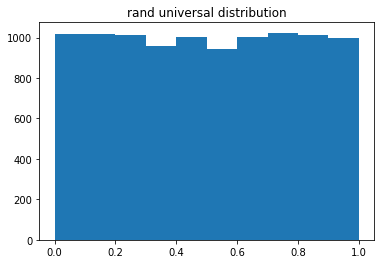

In [2]:
# demonstrating the uniform distribution of the rand function
x = np.random.rand(10000)
plt.hist(x)
plt.title("rand universal distribution")
plt.show()

On the other hand, the randn fuction generates a random number or array from a normal Gaussian distribution with a mean of 0 and a variance of 1. This means that the majority of numbers generated are between -1 and 1 and center largely around 0. The graph below helps to illustrate this; of the 1000 numbers generated, well over half are within the -1 to 1 range and peak at the 0 mark.

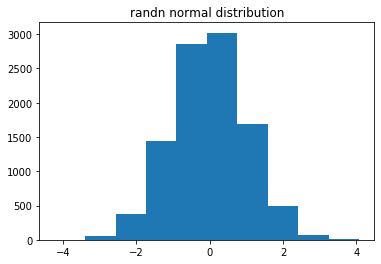

In [3]:
# demonstrating the normal distribution of the randn function
x = np.random.randn(10000)
plt.hist(x)
plt.title("randn normal distribution")
plt.show()

Despite working with different probability distributions, rand and randn function in the same way. Without any arguments, they will produce a single randomly generated number from their assigned distribution:

In [4]:
print("\033[1m" + "rand:" + "\033[0m")
print(np.random.rand())
print()
print("\033[1m" + "randn:" + "\033[0m")
print(np.random.randn())

rand:
0.4375678258986596

randn:
-0.02214020003672077


If arguments are passed, the functions create arrays of randomly generated numbers. There is no limit on the number of arguments that can be entered, so very complex arrays of arrays are achievable. 

In [5]:
print("\033[1m" + "rand:" + "\033[0m")
print(np.random.rand(5))
print()
print("\033[1m" + "randn:" + "\033[0m")
print(np.random.randn(2, 3, 4))

rand:
[0.3982897  0.66786734 0.70134879 0.69054167 0.55630821]

randn:
[[[-0.74902781 -0.08968785 -0.81372979 -0.47042778]
  [-1.22023288 -0.2951168   0.70284909  0.08392641]
  [ 0.8232822   0.89214902 -0.47508473  0.1281504 ]]

 [[-1.2197951   0.29043069  0.07703568 -0.82262726]
  [-0.45818709  0.29059487  0.69286102  1.05942964]
  [ 0.02334052  0.05430241  0.96130339  0.46907087]]]


As mentioned previously, these functions each have a built-in range from which numbers are generated: rand produces numbers between 0 and 1 and the numbers of randn center around a mean of 0. While it is not possible to alter this range within the function arguments, it can be scaled up by multiplying by twice the desired value and then subtracting the desired value (https://www.youtube.com/watch?v=Kh9vsy6t_9c)- <b>may not be the best way and is rand only</b> So for example, if you want the range to be between -5 and 5, you would multipl by 10 and then subtract 5: 

In [6]:
10 * np.random.rand(2) - 5

array([ 2.68093274, -3.65323529])

### randint
Returns randomly generated integers of a given range. This function will not work if there are no arguments passed.
If only one argument is passed, the range runs from 0 up to but not including that number, making it a half-open interval. The code below will return a random number from the range 0 - 9 inclusive. If a float rather than integer is passes, it will round down to the nearest integer. 

low - lowest number in the range. If no high argument is passed then the range runs up to but does not include this number.

high - highest number in the range. Selection is made from lowest number up to but not including this number.

size - shape of output

dtype - specify data type of the output. tried changing to float32 below but not working...

There's another function listed in the numpy.random documentation called random_integer but this has been deprecated - use randint instead.

In [7]:
np.random.randint(10)

6

In [8]:
np.random.randint(6, 10, dtype='float32')

TypeError: Unsupported dtype "float32" for randint

In [ ]:
np.typecodes

### random_sample

There are four functions in the numpy.random library that all operate in the same way:
1. numpy.random.random
2. numpy.random.ranf
3. numpy.random.sample
4. numpy.random.random_sample

https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions
They are essentially all aliases for the random_sample function which returns a single floating point number or array of numbers in the half-open interval 0.0 - 1.0

Difference between random_sample and rand https://stackoverflow.com/questions/47231852/np-random-rand-vs-np-random-random

In [ ]:
np.random.random_sample((2, 4, 6))


### choice
Similar to randint in that it generates a random integer and you can specify a range. However, choice can accept tuples, lists or numpy arrays as input.
size - allows you to determine the shape of the output
replace - true/false boolean. If false, the returned numbers never repeat in the output. Once a number has been generated, it it removed from the pool of available numbers. This allows for unique numbers only. It can generate an error if the pool of numbers to choose from is smaller than output shape. https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice
p - looks like you can set the probability of a set of numbers (default is uniform). SO if I have a tuple (1, 2, 3, 4) and a p value of  

In [ ]:
# will return random numbers from provided tuple
np.random.choice((4, 6, 7, 10), size=3)

In [ ]:
# setting probability
# Here there's a 50/50 chance of 6 and 7 coming up but zero chance of 4 or 10
np.random.choice((4, 6, 7, 10), p = (0, 0.5, 0.5, 0))

### bytes
returns a string of random bytes
Only takes one argument - the number of bytes to be returned 
Good for security such as passwords

In [ ]:
x = np.random.bytes(1000)
x

## Permutations

### shuffle
Shuffles the contents of a given list or array (doesn't seem to accept a tuple - TypeError).
T0akes one argument only - a list or array.
If a list or one-dimensional array is presented, it returns a shuffled version.

In [45]:
# shuffling a list
x = [1, 2, 3, 4, 5, 6]
np.random.shuffle(x)
x

[6, 2, 3, 5, 1, 4]

In [46]:
# shuffling a 1D array of numbers
x = np.array([1, 2, 3, 4, 5, 6])
np.random.shuffle(x)
x

array([3, 2, 4, 5, 1, 6])

If a multidimensional array is passed, the order of the arrays will be shuffled but the order of the numbers within each single array is not affected:

In [47]:
# shuffling a numpy array
x = np.array([[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [2, 4, 6, 8, 0]])
np.random.shuffle(x)
x

array([[2, 4, 6, 8, 0],
       [1, 2, 3, 4, 5],
       [5, 4, 3, 2, 1]])

### permutation

Differences between shuffle and permutation: https://stackoverflow.com/a/15474335
Like the shuffle function, permutation will rearrange the contents of an array but, rather than affecting the array itself, will return a copy of the array with the contents shuffled. The order of the original array is not affected

In [62]:
# accepts a tuple but returns an array
y = (1, 2, 3, 4, 5, 6)
x = np.random.permutation(y)
print(f"x is a {type(x)}")
print(x)
print(f"y is a {type(y)}")
print(y)

x is a <class 'numpy.ndarray'>
[6 4 5 3 1 2]
y is a <class 'tuple'>
(1, 2, 3, 4, 5, 6)


tuple

A single integer argument can be passed to permutations that will return a shuffled version of a range from 0 up to but not including the integer passed. Shuffle does not have the same functionality and will return a TypeError if a single integer is passed.

In [42]:
np.random.permutation(53)

array([42,  5, 47, 32, 17,  1, 16,  0, 30, 39, 24, 27, 20, 21,  7, 14, 37,
       15, 41, 31, 25, 12, 34, 40, 19, 11, 22,  6, 36, 28, 35, 51, 46, 45,
       44, 26, 33,  3, 29,  2, 49, 48, 23, 18, 43,  9, 13, 38, 50,  8, 52,
       10,  4])

In [40]:
np.random.shuffle(5)

TypeError: object of type 'int' has no len()

In [66]:
x = np.array([[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [2, 4, 6, 8, 0]])
np.random.permutation(x)

array([[1, 2, 3, 4, 5],
       [2, 4, 6, 8, 0],
       [5, 4, 3, 2, 1]])

<br>

## Distributions

Examine at least 5 distributions



### Poisson

Continuous (similar to binomial)




(array([  22.,  297., 1905., 2371., 2398., 2153.,  564.,  245.,   36.,
           9.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

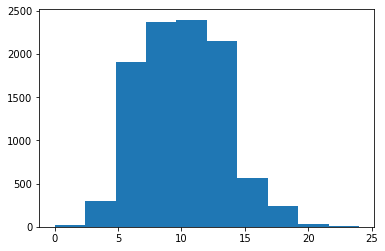

In [88]:
x = np.random.poisson(10, size = 10000)
plt.hist(x)

### Binomial

https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

Discrete (similar to Poisson)


(array([   9.,  107.,  426., 1183., 2012., 2489., 2081., 1154.,  440.,
          99.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

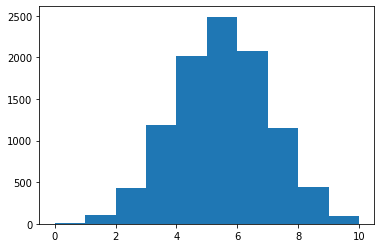

In [81]:
x = np.random.binomial(10, 0.5, size = 10000)
plt.hist(x)

### Exponential

Continuous

https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

Similar to pareto:
https://www.allaboutlean.com/measure-cycle-time-part-1/exponential-and-pareto/

(array([6.710e+03, 2.228e+03, 7.200e+02, 2.340e+02, 7.800e+01, 2.000e+01,
        5.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([1.53806403e-03, 1.12527564e+01, 2.25039748e+01, 3.37551931e+01,
        4.50064115e+01, 5.62576299e+01, 6.75088482e+01, 7.87600666e+01,
        9.00112849e+01, 1.01262503e+02, 1.12513722e+02]),
 <a list of 10 Patch objects>)

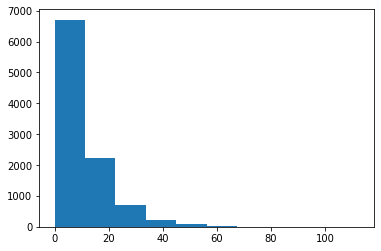

In [93]:
x = np.random.exponential(10, size = 10000)
plt.hist(x)

### Pareto 

aka Lomax distribution

https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

Similar to exponential:
https://www.allaboutlean.com/measure-cycle-time-part-1/exponential-and-pareto/

(array([7.557e+03, 1.729e+03, 4.750e+02, 1.490e+02, 5.300e+01, 1.800e+01,
        1.300e+01, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([5.48132907e-06, 1.50571209e-01, 3.01136937e-01, 4.51702665e-01,
        6.02268393e-01, 7.52834121e-01, 9.03399849e-01, 1.05396558e+00,
        1.20453131e+00, 1.35509703e+00, 1.50566276e+00]),
 <a list of 10 Patch objects>)

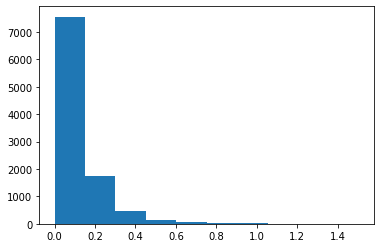

In [94]:
x = np.random.pareto(10, size = 10000)
plt.hist(x)

### Gamma

Continuous

https://www.datacamp.com/community/tutorials/probability-distributions-python - rarely used in its raw form. exponential, chi-squared and erlang distributions are special cases of gamma distribution

(array([224., 312., 202., 116.,  68.,  40.,  24.,   7.,   3.,   4.]),
 array([ 0.04908272,  1.86313577,  3.67718881,  5.49124186,  7.30529491,
         9.11934795, 10.933401  , 12.74745405, 14.5615071 , 16.37556014,
        18.18961319]),
 <a list of 10 Patch objects>)

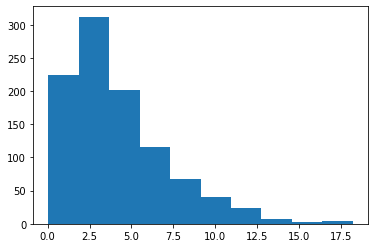

In [96]:
x = np.random.gamma(2, 2, 1000)
plt.hist(x)

### Chi Square

https://www.youtube.com/watch?v=hcDb12fsbBU 

Continuous

Related to standard normal 